![cats_and_dogs](cats_and_dogs.jpg)


## Cats vs Dogs: The Great Pet Debate 🐱🐶

### 📖 Background

You and your friend have debated for years whether cats or dogs make more popular pets. You finally decide to settle the score by analyzing pet data across different regions of the UK. Your friend found data on estimated pet populations, average pets per household, and geographic factors across UK postal code areas. It's time to dig into the numbers and settle the cat vs. dog debate! 

### 💾 The data

There are three data files, which contains the data as follows below.

#### The `population_per_postal_code.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `estimated_cat_population` | The estimated cat population for the postal code area |  
| `estimated_dog_population` | The estimated cat population for the postal code area |


#### The `avg_per_household.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `cats_per_household` | The average number of cats per household in the postal code area |  
| `dog_per_household` | The average number of dogs per household in the postal code area |

#### The `postal_code_areas.csv` data contains these columns:

| Column | Description |
|---------|----------------------------------------|  
| `postal_code` | An identifier for each postal code area|
| `town` | The town/towns which are contained in the postal code area |  
| `county` | The UK county that the postal code area is located in |
| `population` | The population of people in each postal code area |
| `num_households` | The number of households in each postal code area |
| `uk_region` | The region in the UK which the postal code is located in |


***Acknowledgments**: 
Data has been assembled and modified from two different sources: [Animal and Plant Health Agency](https://www.data.gov.uk/search?filters%5Bpublisher%5D=Animal+and+Plant+Health+Agency), [Postcodes](
https://ideal-postcodes.co.uk/guides/postcode-areas).


## 💪 Challenge

Leverage the pet data to analyze and compare cat vs. dog rates across different regions of the UK. Your goal is to identify factors associated with higher cat or dog popularity.  

Some examples:

- Examine if pet preferences correlate to estimated pet populations, or geographic regions. Create visualizations to present your findings.
- Develop an accessible summary of study findings on factors linked to cat and dog ownership rates for non-technical audiences.
- See if you can identify any regional trends; which areas prefer cats vs. dogs?

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set_style('whitegrid')

pd.set_option('display.float_format', '{:,.2f}'.format)


In [2]:
population_raw_data = pd.read_csv('data/population_per_postal_code.csv')
avg_raw_data = pd.read_csv('data/avg_per_household.csv')
postcodes_raw_data = pd.read_csv('data/postal_codes_areas.csv')

In [3]:
population_raw_data.head()

,postal_code,estimated_cat_population,estimated_dog_population
0,AB10,"1,675.72","1,921.75"
1,AB11,"2,072.99","2,377.35"
2,AB12,"3,601.57","4,130.35"
3,AB13,"1,153.84","1,323.24"
4,AB14,"2,325.13","2,666.50"


In [4]:
avg_raw_data.head()

,postcode,cats_per_household,dogs_per_household
0,AB10,0.16,0.19
1,AB11,0.21,0.24
2,AB12,0.30,0.34
3,AB13,1.15,1.31
4,AB14,1.01,1.16


In [5]:
postcodes_raw_data.head()

,postal_code,town,county,population,num_households,uk_region
0,AB1,Aberdeen,Aberdeen,NaN,NaN,Scotland
1,AB2,Aberdeen,Aberdeen,NaN,NaN,Scotland
2,AB3,Aberdeen,Aberdeen,NaN,NaN,Scotland
3,AB4,"Fraserburgh, Peterhead, Macduff",Aberdeen,NaN,NaN,Scotland
4,AB5,"Buckie, Huntly, Inverurie",Aberdeen,NaN,NaN,Scotland


# Data Preprocessing

In [6]:
population_raw_data['estimated_dog_population'] = population_raw_data['estimated_dog_population'].str.replace(',','').astype(float)
population_raw_data['estimated_cat_population'] = population_raw_data['estimated_cat_population'].str.replace(',','').astype(float)

# Q1. Examine if pet preferences correlate to estimated pet populations, or geographic regions. Create visualizations to present your findings.

## By Populations

In [7]:
merge = pd.merge(population_raw_data, avg_raw_data, left_on = 'postal_code', right_on = 'postcode').drop('postcode', axis = 1)

In [8]:
merge[['estimated_cat_population','cats_per_household']].corr()

,estimated_cat_population,cats_per_household
estimated_cat_population,1.00,0.39
cats_per_household,0.39,1.00


In [9]:
merge[['estimated_dog_population','dogs_per_household']].corr()

,estimated_dog_population,dogs_per_household
estimated_dog_population,1.00,0.39
dogs_per_household,0.39,1.00


In [10]:
df = pd.merge(merge, postcodes_raw_data, on = 'postal_code', how = 'left')

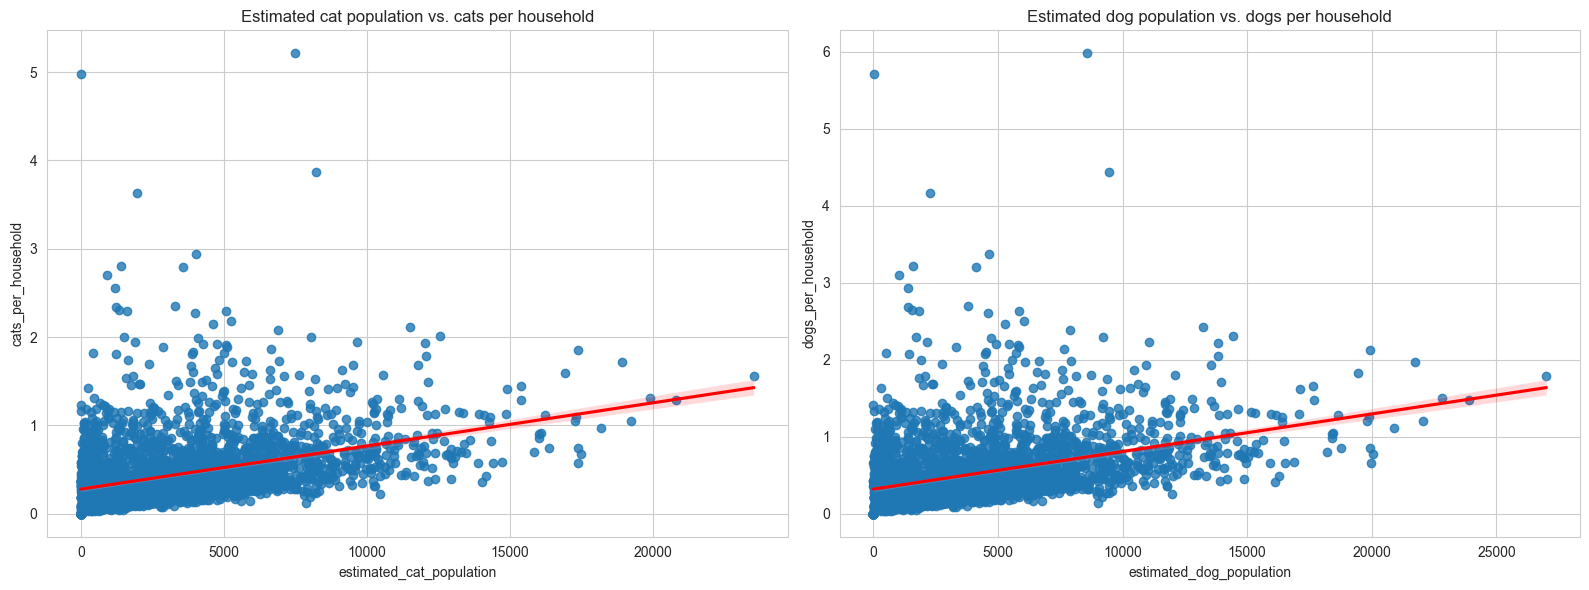

In [11]:
plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
sns.regplot(data = df, x = 'estimated_cat_population', y = 'cats_per_household', line_kws={'color':'red'})
ax = plt.title("Estimated cat population vs. cats per household")

plt.subplot(1, 2, 2)
sns.regplot(data = df, x = 'estimated_dog_population', y = 'dogs_per_household', line_kws={'color':'red'})
plt.title("Estimated dog population vs. dogs per household")

plt.tight_layout()

## Q2. Identifying Regional Trends

In [12]:
df['preference'] = df[['cats_per_household','dogs_per_household']].apply(lambda row: 'cats' if row[0] > row[1] else 'dogs', axis = 1)

/var/folders/qq/_pxy1w012md00pykw2bn68bw0000gn/T/ipykernel_5591/4036280182.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['preference'] = df[['cats_per_household','dogs_per_household']].apply(lambda row: 'cats' if row[0] > row[1] else 'dogs', axis = 1)


In [13]:
# Number of counties that prefer dogs to cats: ALL OF THEM
df['preference'].value_counts(normalize=True)

preference
dogs   1.00
Name: proportion, dtype: float64

### Key takeaway: dogs are universally preferred to cats across regions

In [14]:
df['dogs_minus_cats'] = df['dogs_per_household'] - df['cats_per_household']

/Users/brettlill/.pyenv/versions/3.10.6/envs/lang-env/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


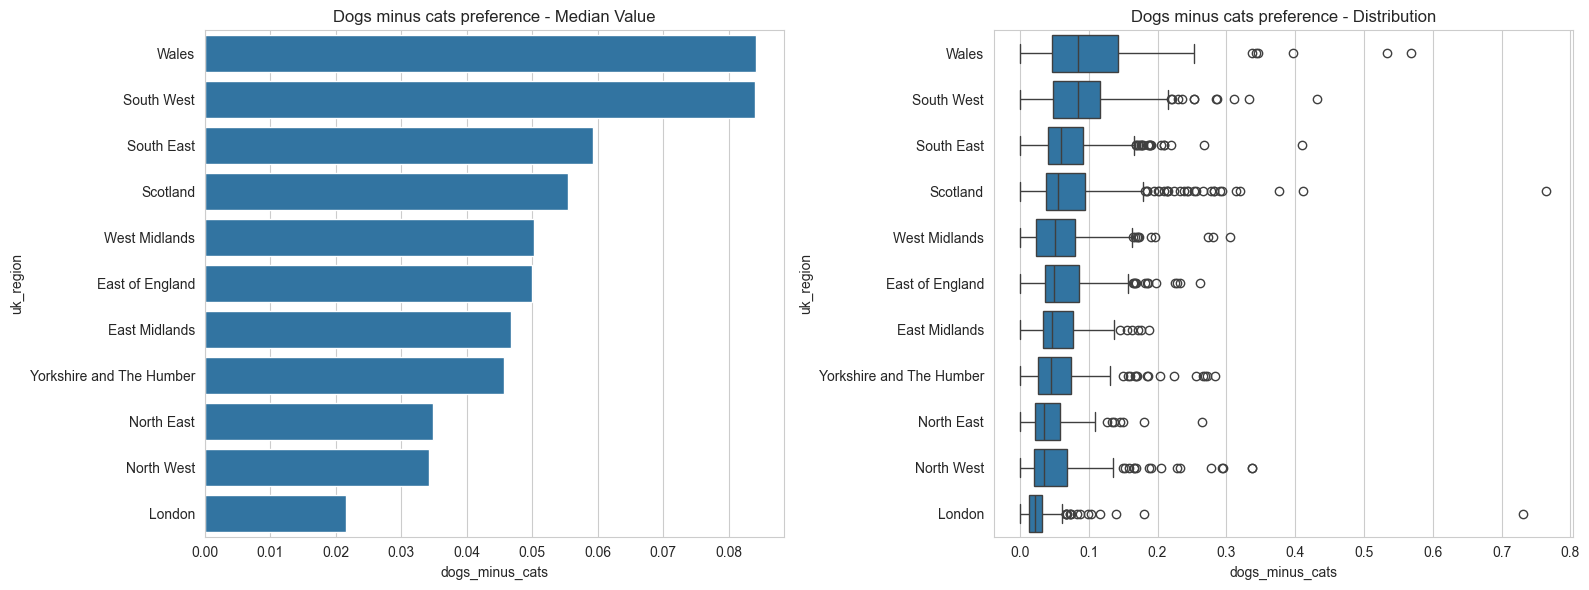

In [15]:
plt.figure(figsize = (16, 6))
tmp = df.groupby('uk_region')['dogs_minus_cats'].median().reset_index().sort_values(by = 'dogs_minus_cats', ascending = False)
plt.subplot(1, 2, 1)
sns.barplot(data = tmp, x = 'dogs_minus_cats', y = 'uk_region')
plt.title("Dogs minus cats preference - Median Value")
order = tmp['uk_region'].values

plt.subplot(1, 2, 2)
sns.boxplot(data = df, x = 'dogs_minus_cats', y = 'uk_region', order=order)
plt.title("Dogs minus cats preference - Distribution")

plt.tight_layout()

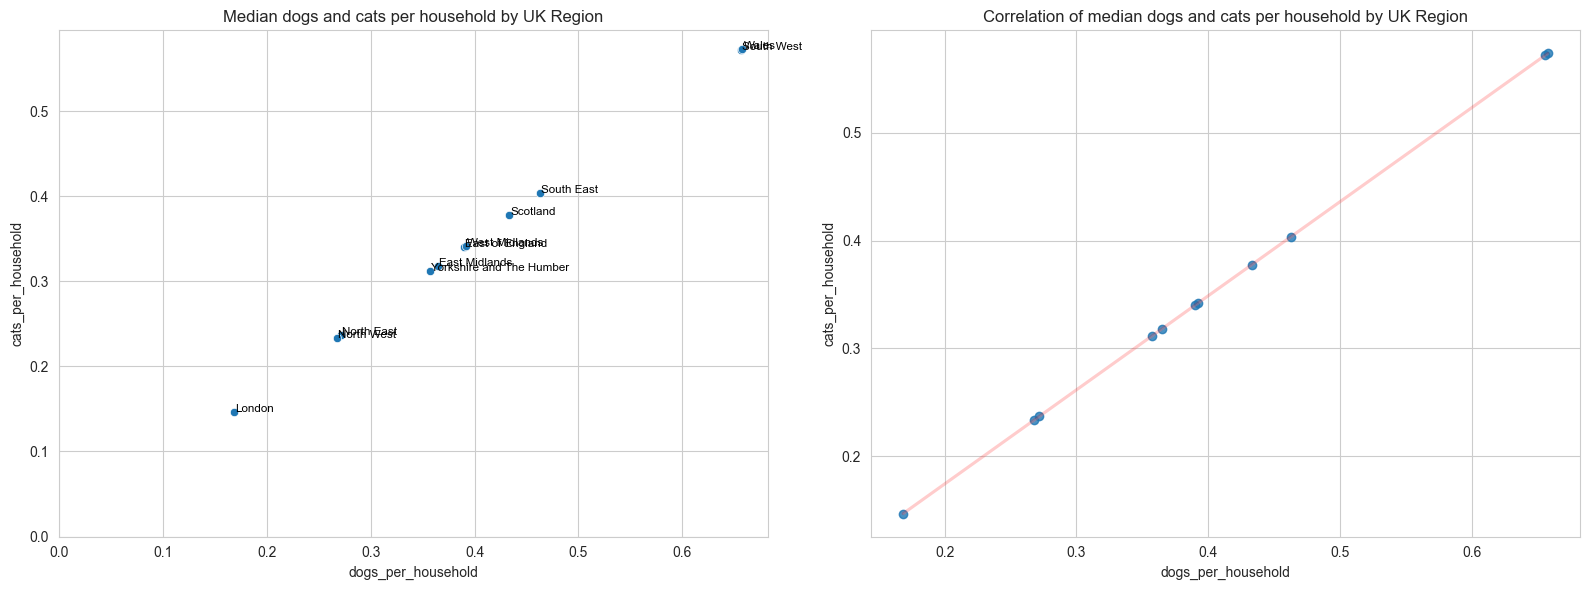

In [16]:
plt.figure(figsize = (16, 6))
tmp = df.groupby('uk_region')[['dogs_per_household','cats_per_household']].median().reset_index()

plt.subplot(1, 2, 1)
ax = sns.scatterplot(data = tmp, x = 'dogs_per_household', y = 'cats_per_household')

# Annotate each point in the scatter plot
for i in range(tmp.shape[0]):
    ax.text(tmp['dogs_per_household'][i] + 0.001,  # use proper indexing for DataFrame columns
            tmp['cats_per_household'][i],  # use proper indexing for DataFrame columns
            tmp['uk_region'][i],  # use proper indexing for DataFrame columns
            horizontalalignment='left',
            size='small', color='black', weight=None)

plt.xlim(0)
plt.ylim(0)
plt.title("Median dogs and cats per household by UK Region")

plt.subplot(1, 2, 2)
sns.regplot(data = tmp, x = 'dogs_per_household', y = 'cats_per_household', line_kws={'color':'red', 'alpha': 0.2})
plt.title("Correlation of median dogs and cats per household by UK Region")
plt.tight_layout()

In [17]:
mapping = df[['uk_region', 'county']].sort_values(by = 'uk_region').drop_duplicates()
regions = mapping['uk_region'].unique()

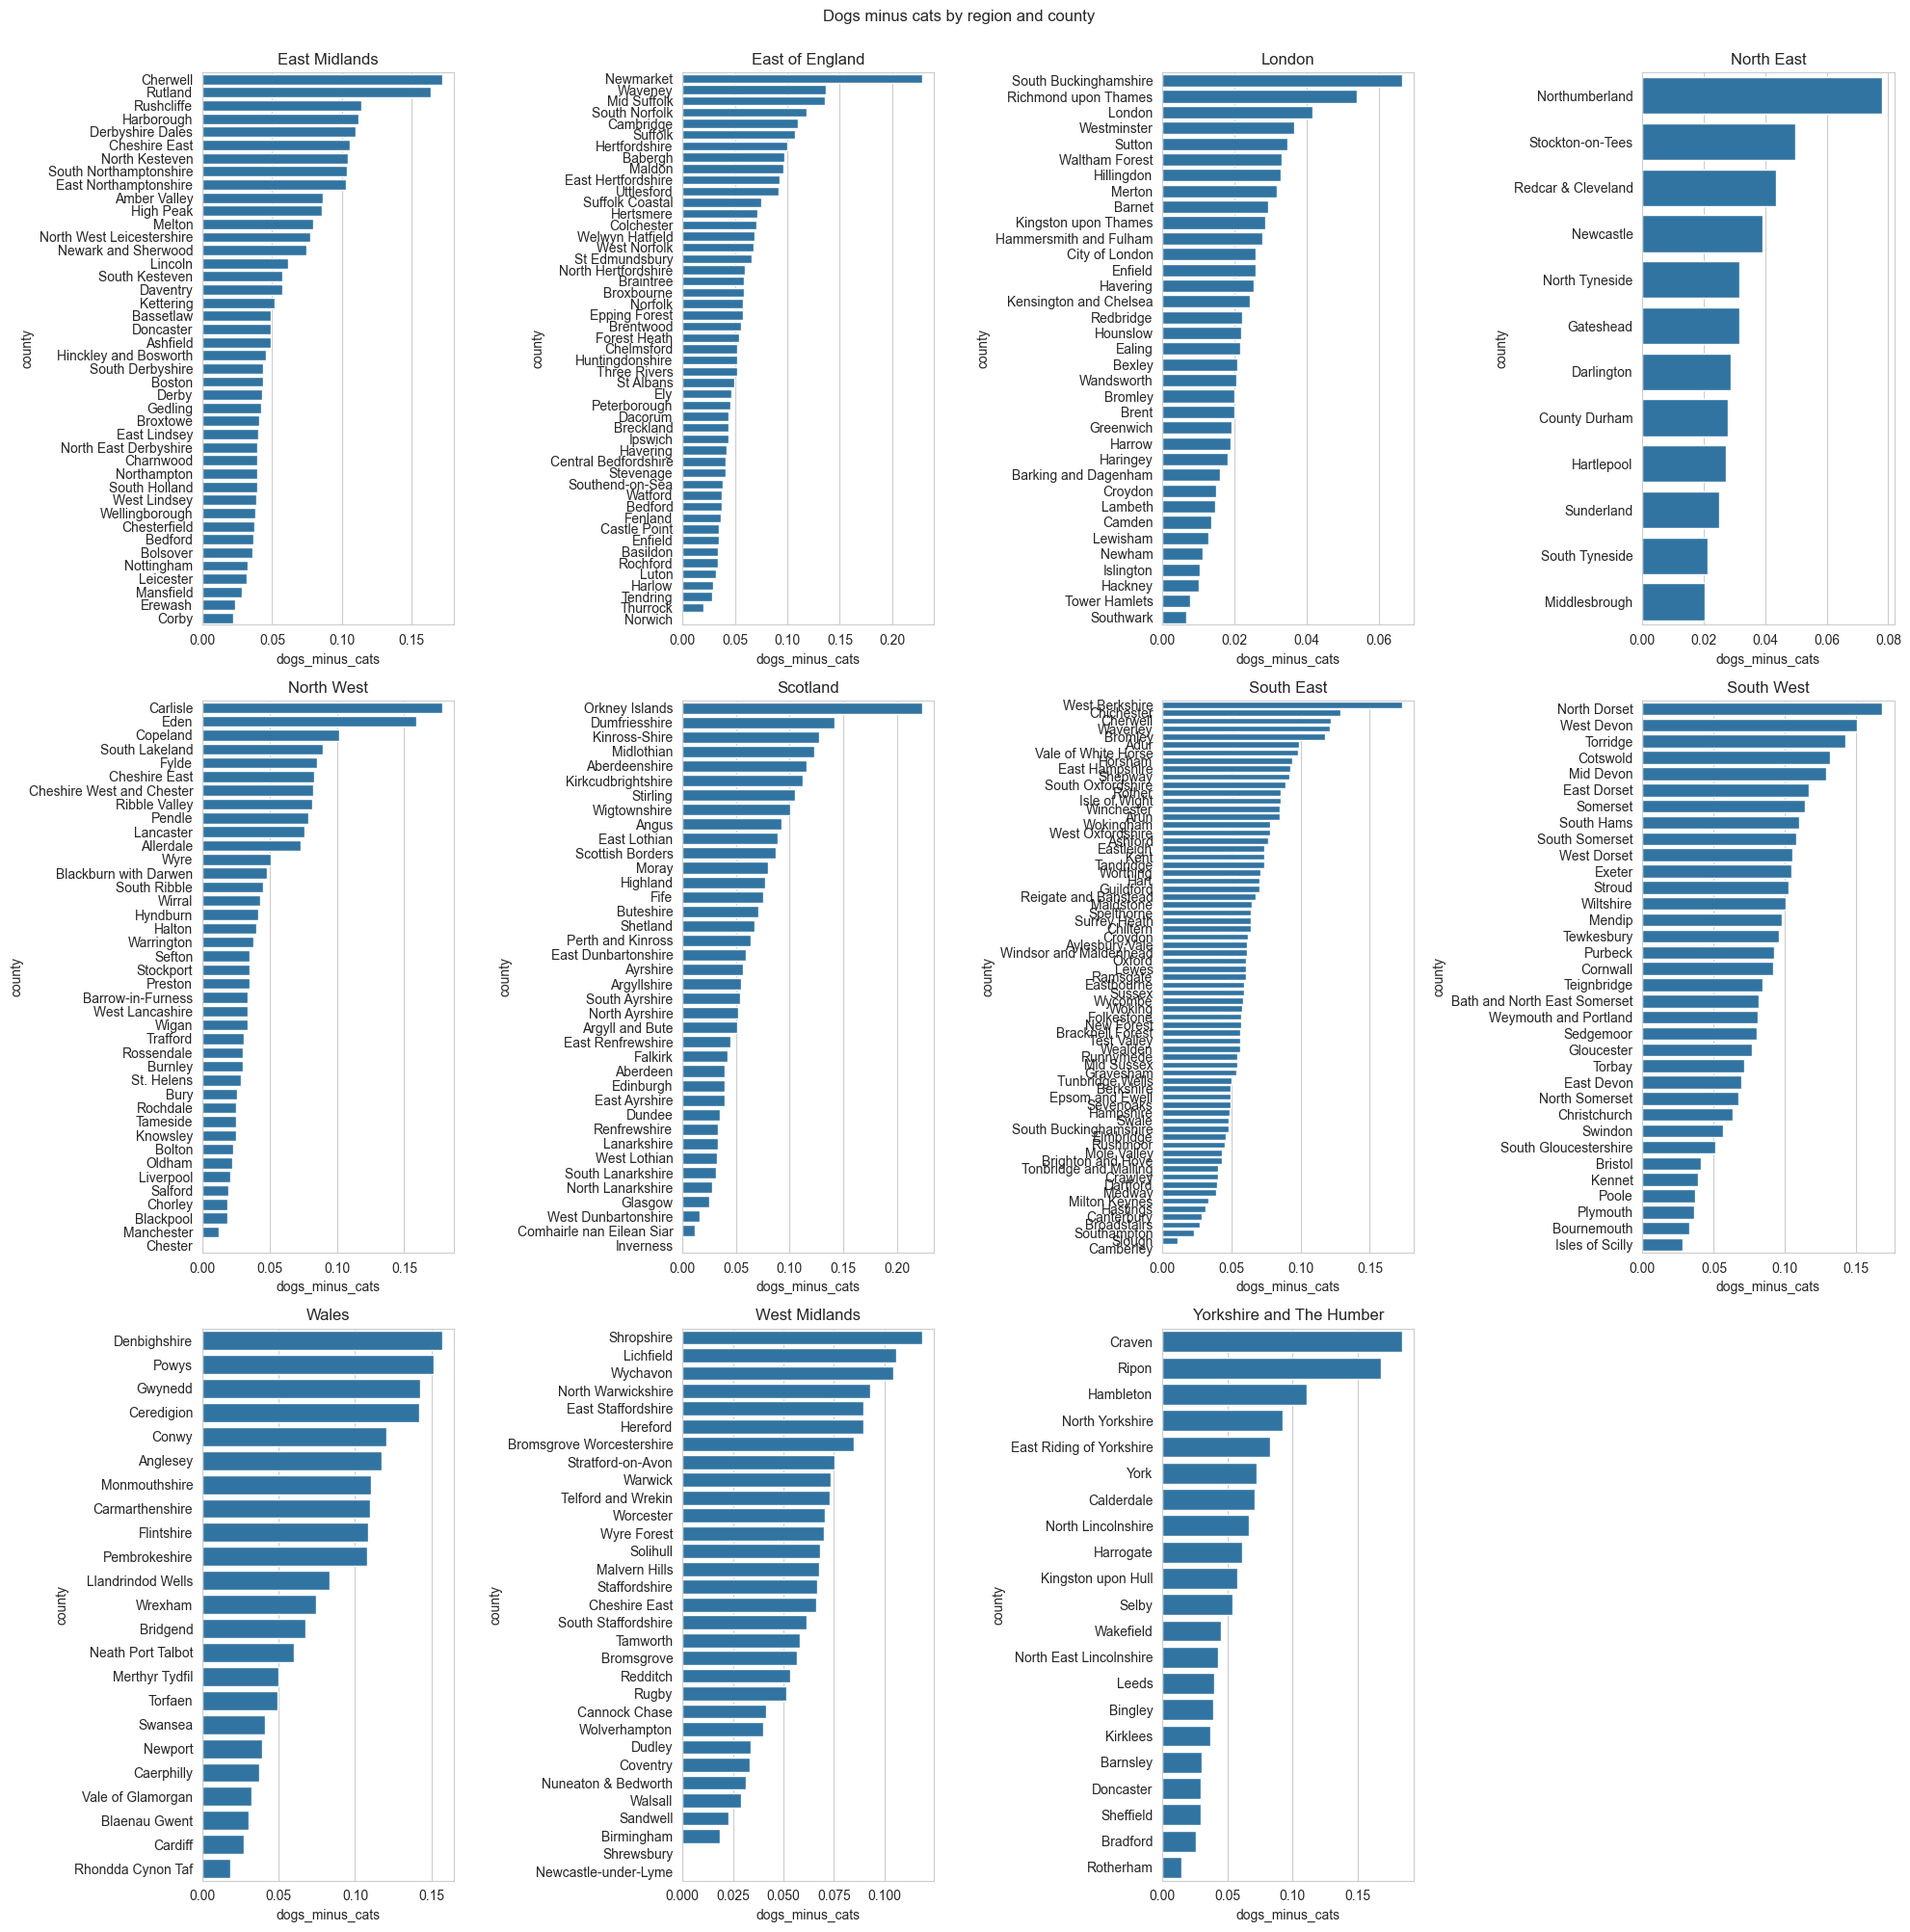

In [19]:
df = df.sort_values(by = ['uk_region','county'], ascending = True)
total_regions = len(regions)

fig, axs = plt.subplots(3, 4, figsize = (20, 20))
axs = axs.flatten()

i = 0
for region in regions:
    tmp = df[df['uk_region'] == region]
    counties = tmp['county'].unique()
    tmp2 = tmp.groupby('county')['dogs_minus_cats'].median().reset_index().sort_values(by = 'dogs_minus_cats', ascending = False)
    tmp2.columns = ['county', 'dogs_minus_cats']
    sns.barplot(data = tmp2, x = 'dogs_minus_cats', y = 'county', ax = axs[i])
    axs[i].set_title(f"{region}")
    i += 1

fig.suptitle("Dogs minus cats by region and county", verticalalignment='top', y = 1)
fig.delaxes(axs[-1])

plt.tight_layout()